In [10]:
from Model import np, TS, UCB, Bandit, TS2
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

np.random.seed(0)

In [11]:
def run(alg, n, T=None, *, print_values=False, bandits=None, loading=False):
    bandits = [Bandit(i) for i in range(n)] if bandits is None else bandits
    optimal = max(bandits, key=lambda index: index.mean).mean
    if T is None:
        T = n * 5
    regret = 0
    alg = alg(n, bandits)
    regrets = [0]
    bandit_count = {i:0 for i in bandits}

    for i in tqdm(range(T)) if loading else range(T):
        bandit, reward = alg.draw()
        bandit_count[bandit] += 1

        regret += optimal - bandit.mean
        regrets.append(regret)

    plt.plot(range(T+1), regrets, label=alg.name)
    if print_values:
        print(optimal)
        
        for key, value in bandit_count.items():
            print(key, value)
        print()
    most = max(bandit_count, key=bandit_count.get)
    print(most, bandit_count[most])
    if alg.name == "TS":
        num = 1000
        for p in alg.params:
            print(p.bandit)
            print(sum(np.sqrt(1/np.random.gamma(p.alpha, 1/p.beta)) for _ in range(num))/num)
            print(p.alpha/p.beta, p.nu, np.sqrt(p.beta/p.alpha))
            print()
    return bandits


Bandit 10: mean 97.8618342232764 std 7.9915856421672355
Bandit 4: mean 96.36627605010293 std 3.8344151882577773 81
Bandit 0: mean 54.88135039273247 std 7.151893663724195
1.8060281319588116
1.0 1 1.0

Bandit 1: mean 60.276337607164386 std 5.448831829968968
1.9036610283274111
1.0 1 1.0

Bandit 2: mean 42.36547993389047 std 6.458941130666561
1.7693440175569415
1.0 1 1.0

Bandit 3: mean 43.75872112626925 std 8.917730007820797
2.0356385146604348
1.0 1 1.0

Bandit 4: mean 96.36627605010293 std 3.8344151882577773
4.162464816957255
0.058956645992283896 81 4.11844827212155

Bandit 5: mean 79.17250380826646 std 5.288949197529044
1.7777382088635127
1.0 1 1.0

Bandit 6: mean 56.80445610939323 std 9.25596638292661
1.7630779322456365
1.0 1 1.0

Bandit 7: mean 7.103605819788694 std 0.8712929970154071
1.808997061001248
1.0 1 1.0

Bandit 8: mean 2.021839744032572 std 8.32619845547938
1.9009628142280421
1.0 1 1.0

Bandit 9: mean 77.81567509498505 std 8.700121482468191
1.790735744273637
1.0 1 1.0

Bandit

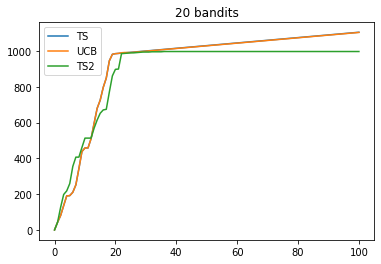

In [12]:
n = 20
while n < 21:
    bandits = [Bandit(i) for i in range(n)]
    optimal = max(bandits, key=lambda index: index.mean)
    print(optimal)
    run(TS, n, bandits=bandits)
    run(UCB, n, bandits=bandits)
    run(TS2, n, bandits=bandits)
    plt.legend()
    plt.title(f"{n} bandits")
    plt.show()
    n*=2

https://jmlr.csail.mit.edu/papers/volume18/15-154/15-154.pdf